# Problem Statement:
Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
to reduce sales and hold back inventory for those expensive last-minute expensive 
purchases)
So, we have to work on a project where you collect data of flight fares with other features and 
work to make a model to predict fares of flights.

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV


from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('Scrapped_Flight_Data.csv')

In [3]:
data.head()

,Unnamed: 0,Airline_name,date_of_journey,Source,Destination,Departure_time,Arrival_time,Duration,Total_stops,Price
0,0,Vistara,29 Apr,New Delhi,Mumbai,06:00,08:00,2h 00m,Non,4800
1,1,Air India,29 Apr,New Delhi,Mumbai,07:00,09:05,2h 05m,Non,4800
2,2,Air Asia,29 Apr,New Delhi,Mumbai,04:25,06:35,2h 10m,Non,4800
3,3,Air India,29 Apr,New Delhi,Mumbai,08:00,10:10,2h 10m,Non,4800
4,4,Vistara,29 Apr,New Delhi,Mumbai,20:40,22:50,2h 10m,Non,4800


# Data Description

In [5]:
data.shape

(1727, 10)

1.As the Price seems to be continuos value we will be using Regression algorithm for the flight price prediction .

2.Some of values in Arrival Time column is having day along with the time.

3.Other categorical variables will changed to numerical variables. 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1727 non-null   int64 
 1   Airline_name     1727 non-null   object
 2   date_of_journey  1727 non-null   object
 3   Source           1727 non-null   object
 4   Destination      1727 non-null   object
 5   Departure_time   1727 non-null   object
 6   Arrival_time     1727 non-null   object
 7   Duration         1727 non-null   object
 8   Total_stops      1727 non-null   object
 9   Price            1727 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 135.0+ KB


All data seems to be categorical except our target variable which in numerical.
Unnamed 0 column has no role in the dataset so we can clearly drop the column.

In [7]:
data.columns

Index(['Unnamed: 0', 'Airline_name', 'date_of_journey', 'Source',
       'Destination', 'Departure_time', 'Arrival_time', 'Duration',
       'Total_stops', 'Price'],
      dtype='object')

# Data Preprocessing

Check for null values

In [8]:
data.isnull().sum()

Unnamed: 0         0
Airline_name       0
date_of_journey    0
Source             0
Destination        0
Departure_time     0
Arrival_time       0
Duration           0
Total_stops        0
Price              0
dtype: int64

The dataset seems to have no null values in it.

In [9]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
data.head()

,Airline_name,date_of_journey,Source,Destination,Departure_time,Arrival_time,Duration,Total_stops,Price
0,Vistara,29 Apr,New Delhi,Mumbai,06:00,08:00,2h 00m,Non,4800
1,Air India,29 Apr,New Delhi,Mumbai,07:00,09:05,2h 05m,Non,4800
2,Air Asia,29 Apr,New Delhi,Mumbai,04:25,06:35,2h 10m,Non,4800
3,Air India,29 Apr,New Delhi,Mumbai,08:00,10:10,2h 10m,Non,4800
4,Vistara,29 Apr,New Delhi,Mumbai,20:40,22:50,2h 10m,Non,4800


In [11]:
print('Airline_name:',data.Airline_name.nunique())
print('Source:',data.Source.nunique())
print('Destination:',data.Destination.nunique())
print('Total_stops:',data.Total_stops.nunique())

Airline_name: 7
Source: 26
Destination: 29
Total_stops: 5


In [12]:
data.Total_stops.value_counts()

1      883
Non    779
2       58
3        6
4        1
Name: Total_stops, dtype: int64

Treating departure time and arrival time

In [13]:
# Handling Departure_time
data['Dep_hour']=pd.to_datetime(data['Departure_time']).dt.hour
data['Dep_min']=pd.to_datetime(data['Departure_time']).dt.minute
data=data.drop(['Departure_time'],axis=1)

In [14]:
data.head()

,Airline_name,date_of_journey,Source,Destination,Arrival_time,Duration,Total_stops,Price,Dep_hour,Dep_min
0,Vistara,29 Apr,New Delhi,Mumbai,08:00,2h 00m,Non,4800,6,0
1,Air India,29 Apr,New Delhi,Mumbai,09:05,2h 05m,Non,4800,7,0
2,Air Asia,29 Apr,New Delhi,Mumbai,06:35,2h 10m,Non,4800,4,25
3,Air India,29 Apr,New Delhi,Mumbai,10:10,2h 10m,Non,4800,8,0
4,Vistara,29 Apr,New Delhi,Mumbai,22:50,2h 10m,Non,4800,20,40


In [15]:
# Handling Arrival_time
data['Arrival_hour']=pd.to_datetime(data['Arrival_time']).dt.hour
data['Arrival_min']=pd.to_datetime(data['Arrival_time']).dt.minute
data=data.drop(['Arrival_time'],axis=1)

In [16]:
data.head()

,Airline_name,date_of_journey,Source,Destination,Duration,Total_stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Vistara,29 Apr,New Delhi,Mumbai,2h 00m,Non,4800,6,0,8,0
1,Air India,29 Apr,New Delhi,Mumbai,2h 05m,Non,4800,7,0,9,5
2,Air Asia,29 Apr,New Delhi,Mumbai,2h 10m,Non,4800,4,25,6,35
3,Air India,29 Apr,New Delhi,Mumbai,2h 10m,Non,4800,8,0,10,10
4,Vistara,29 Apr,New Delhi,Mumbai,2h 10m,Non,4800,20,40,22,50


In [17]:
# Handling Duration

duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


In [18]:
data['duration_hours']=duration_hours
data['duration_mins']=duration_mins
data.drop(['Duration'],axis=1,inplace=True)

In [19]:
data.head()

,Airline_name,date_of_journey,Source,Destination,Total_stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,Vistara,29 Apr,New Delhi,Mumbai,Non,4800,6,0,8,0,2,0
1,Air India,29 Apr,New Delhi,Mumbai,Non,4800,7,0,9,5,2,5
2,Air Asia,29 Apr,New Delhi,Mumbai,Non,4800,4,25,6,35,2,10
3,Air India,29 Apr,New Delhi,Mumbai,Non,4800,8,0,10,10,2,10
4,Vistara,29 Apr,New Delhi,Mumbai,Non,4800,20,40,22,50,2,10


In [20]:
# Handling Total_stops

data.Total_stops.value_counts()

1      883
Non    779
2       58
3        6
4        1
Name: Total_stops, dtype: int64

In [21]:


data.Total_stops.replace({"Non": 0, "1": 1, "2": 2, "3": 3, "4": 4}, inplace = True)

In [22]:
data.head()

,Airline_name,date_of_journey,Source,Destination,Total_stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,Vistara,29 Apr,New Delhi,Mumbai,0,4800,6,0,8,0,2,0
1,Air India,29 Apr,New Delhi,Mumbai,0,4800,7,0,9,5,2,5
2,Air Asia,29 Apr,New Delhi,Mumbai,0,4800,4,25,6,35,2,10
3,Air India,29 Apr,New Delhi,Mumbai,0,4800,8,0,10,10,2,10
4,Vistara,29 Apr,New Delhi,Mumbai,0,4800,20,40,22,50,2,10


In [23]:
data.tail()

,Airline_name,date_of_journey,Source,Destination,Total_stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
1722,Vistara,20 Jun,Patna,Bangalore,2,12237,10,0,19,30,9,30
1723,Vistara,20 Jun,Patna,Bangalore,2,12237,10,0,8,50,22,50
1724,Vistara,20 Jun,Patna,Bangalore,2,12447,10,0,16,0,30,0
1725,Vistara,20 Jun,Patna,Bangalore,2,12657,20,30,10,45,14,15
1726,Vistara,20 Jun,Patna,Bangalore,2,12657,20,30,16,0,19,30


doj=list(data['date_of_journey'])
doj

def convert(date_time):
    format='%d %b'
    datetime_str=datetime.datetime.strptime(date_time,format)
    return datetime_str
#date_time=data['date_of_journey']
for i in doj:
    print(convert(i))

In [24]:
# 2. Treating the Date_of_Journey columns and make seperate columns


data['date_of_journey']=pd.to_datetime(data['date_of_journey'],format='%d %b')

#flight_train['year']=flight_train['Date_of_Journey'].apply(lambda x:x.year)
data['Month']=data['date_of_journey'].apply(lambda x:x.month)
data['Day']=data['date_of_journey'].apply(lambda x:x.day)
data=data.drop(['date_of_journey'],axis=1)

In [25]:
data

,Airline_name,Source,Destination,Total_stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Month,Day
0,Vistara,New Delhi,Mumbai,0,4800,6,0,8,0,2,0,4,29
1,Air India,New Delhi,Mumbai,0,4800,7,0,9,5,2,5,4,29
2,Air Asia,New Delhi,Mumbai,0,4800,4,25,6,35,2,10,4,29
3,Air India,New Delhi,Mumbai,0,4800,8,0,10,10,2,10,4,29
4,Vistara,New Delhi,Mumbai,0,4800,20,40,22,50,2,10,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,Vistara,Patna,Bangalore,2,12237,10,0,19,30,9,30,6,20
1723,Vistara,Patna,Bangalore,2,12237,10,0,8,50,22,50,6,20
1724,Vistara,Patna,Bangalore,2,12447,10,0,16,0,30,0,6,20
1725,Vistara,Patna,Bangalore,2,12657,20,30,10,45,14,15,6,20


In [26]:
# Changing datatype to numerical columns as the data in it are numerical in nature but object type:

data.Total_stops=data.Total_stops.astype('int64')
data.Price=data.Price.astype('int64')
data.Month=data.Month.astype('int64')
data.Day=data.Day.astype('int64')
data.Dep_hour=data.Dep_hour.astype('int64')
data.Dep_min=data.Dep_min.astype('int64')
data.Arrival_hour=data.Arrival_hour.astype('int64')
data.Arrival_min=data.Arrival_min.astype('int64')
data.duration_hours=data.duration_hours.astype('int64')
data.duration_mins=data.duration_mins.astype('int64')


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline_name    1727 non-null   object
 1   Source          1727 non-null   object
 2   Destination     1727 non-null   object
 3   Total_stops     1727 non-null   int64 
 4   Price           1727 non-null   int64 
 5   Dep_hour        1727 non-null   int64 
 6   Dep_min         1727 non-null   int64 
 7   Arrival_hour    1727 non-null   int64 
 8   Arrival_min     1727 non-null   int64 
 9   duration_hours  1727 non-null   int64 
 10  duration_mins   1727 non-null   int64 
 11  Month           1727 non-null   int64 
 12  Day             1727 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 175.5+ KB


# Exploratory Data Analysis

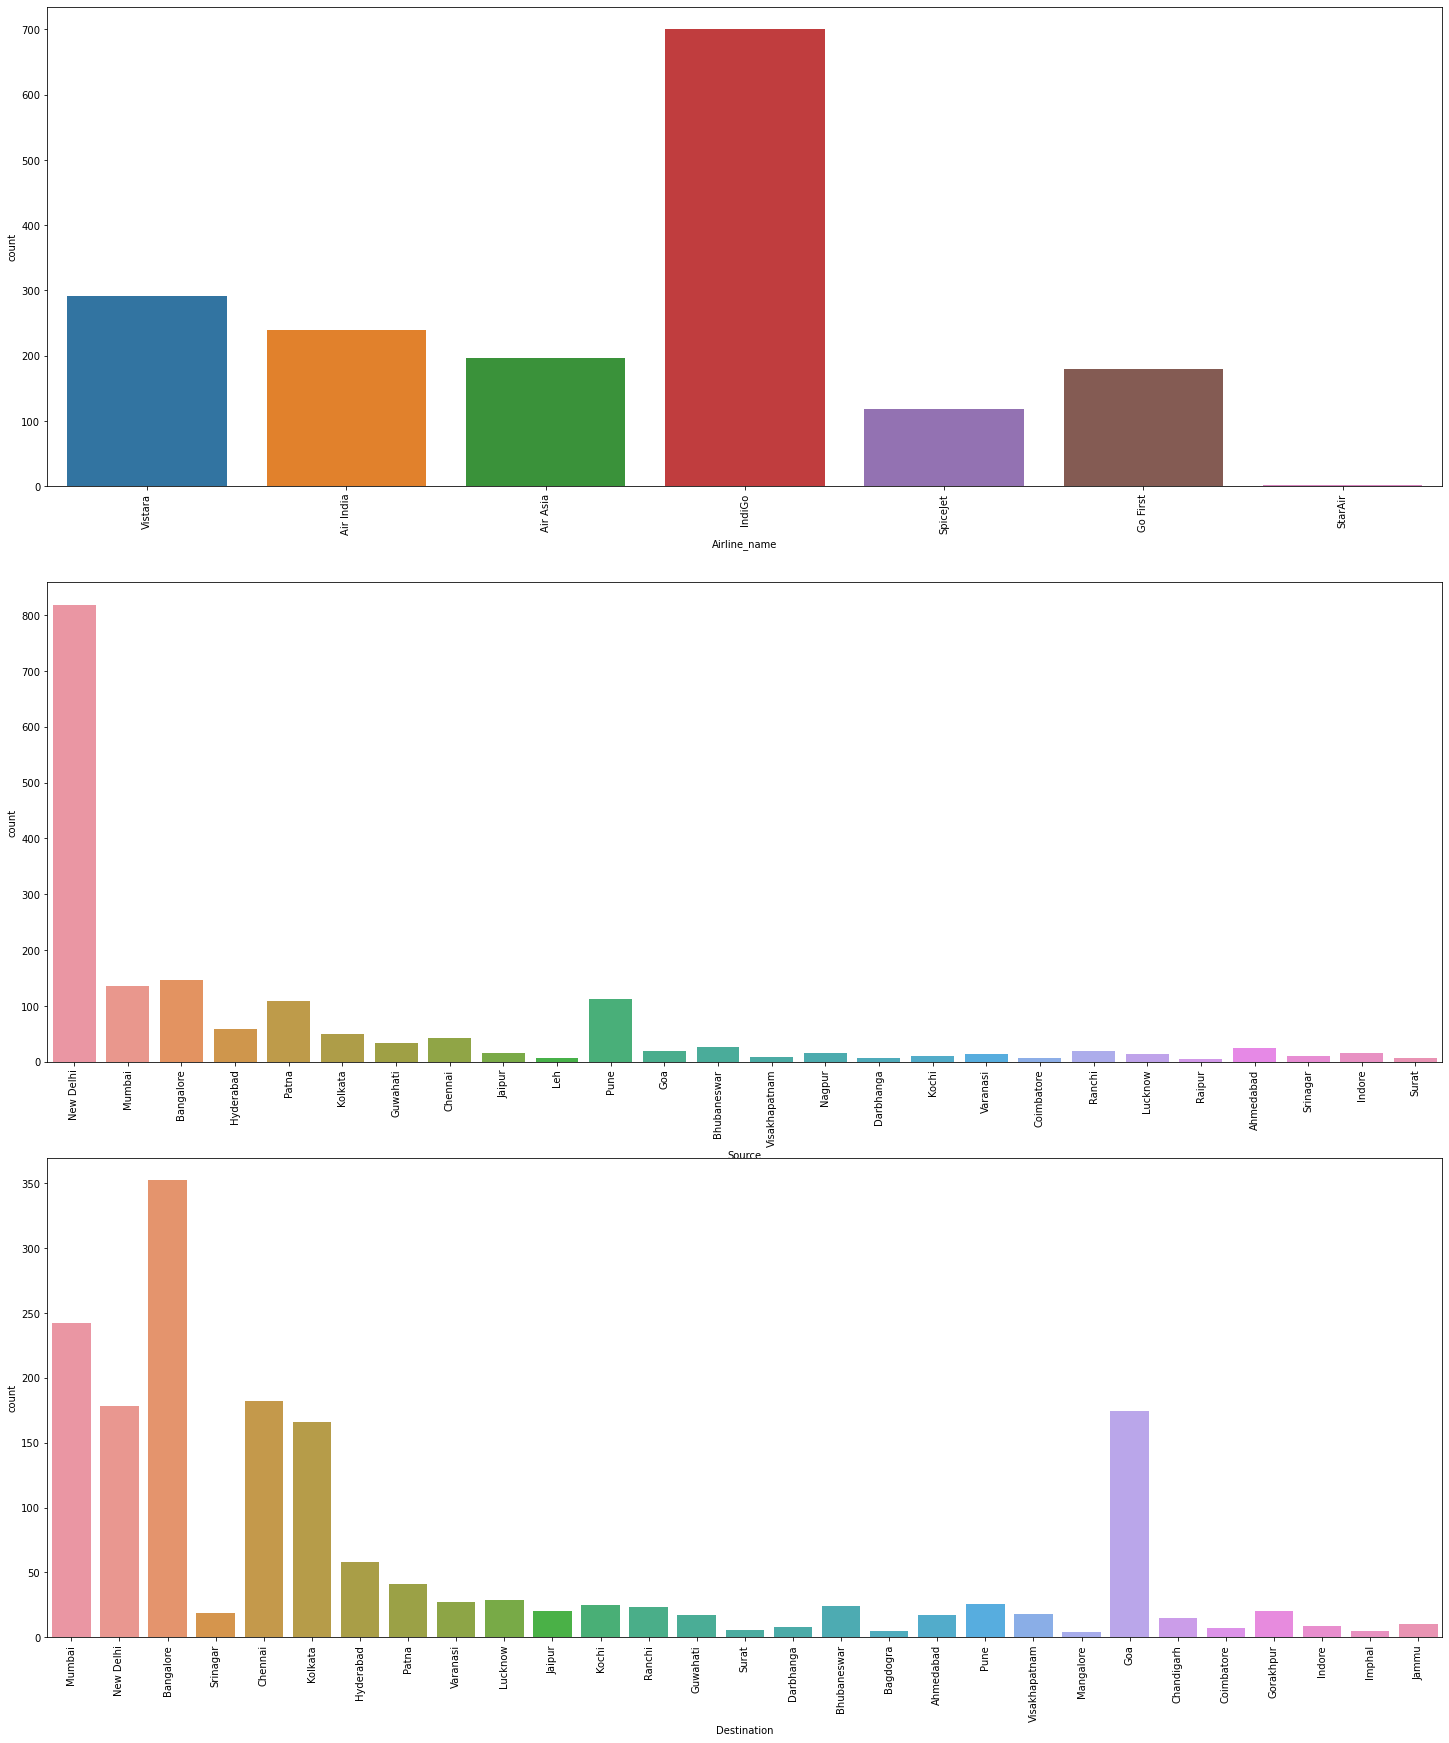

In [28]:
cat=['Airline_name','Source','Destination']
a=1
plt.figure(figsize=(25,30))
for i in cat:
    plt.subplot(3,1,a)
    sns.countplot(data[i])
    plt.xticks(rotation=90)
    a=a+1
plt.show()

Observation:
1. Highest no of flight recorded are Indigo followed by Vistara  then Air India.
2. Most no.of flights are starting from New Delhi followed by Banglore then Mumbai and so on.
3. Most of the destination of flights are to Banglore followed by Mumbai,New Delhi ,Chennai and so on.

In [29]:
data.columns

Index(['Airline_name', 'Source', 'Destination', 'Total_stops', 'Price',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hours',
       'duration_mins', 'Month', 'Day'],
      dtype='object')

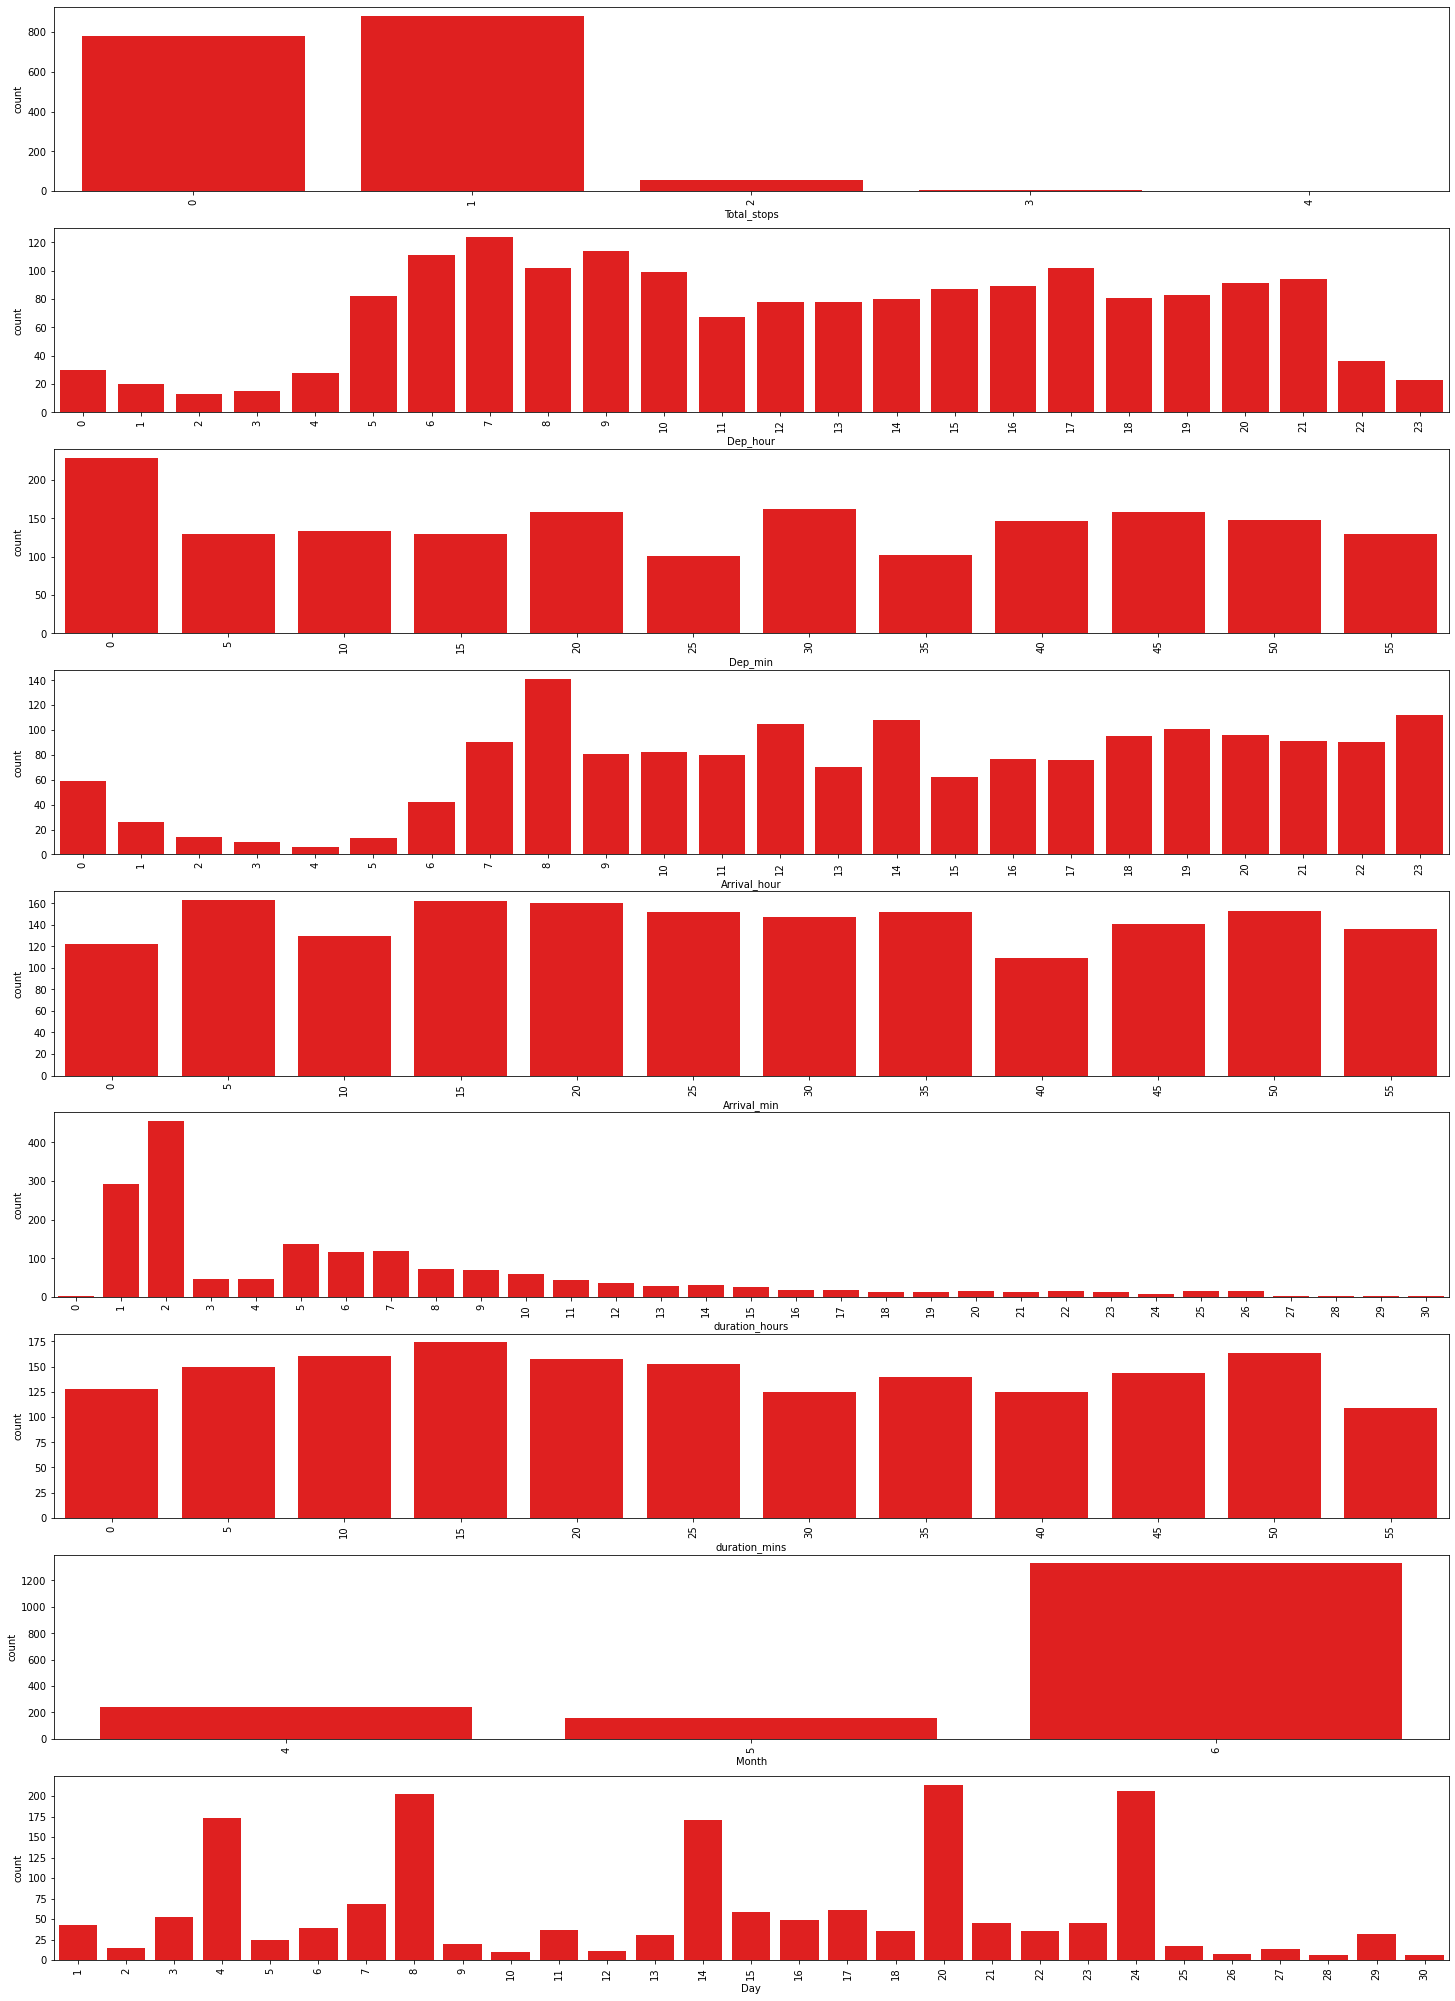

In [30]:
num=['Total_stops','Dep_hour','Dep_min','Arrival_hour','Arrival_min','duration_hours','duration_mins','Month','Day']
a=1
plt.figure(figsize=(25,40))
for i in num:
    plt.subplot(10,1,a)
    sns.countplot(data[i],color='r')
    plt.xticks(rotation=90)
    a=a+1
plt.show()

Observation:
1. Most of the flights are having 1 stop followed by no.of non-stop flights.
2. Departure are maximum durin morning 5am to 9am hour as compared to other time during the day.
3. Most of the flights take off at 00 mins.
4. Most of the flights arrive 8am followed by 12pm ,2pm and 11pm hour.
5. More or less every minutes flights are arriving.
6. Flights with journey as 2 to 1 hours are maximum.
7. flights duration are more or less same during every minutes.
8. Flights are more in number during the months of June.
9. Highest no.of flight are on 4th,8th,14th,20th,24th of the month. 

# Bivariant Plot for Categorical Data


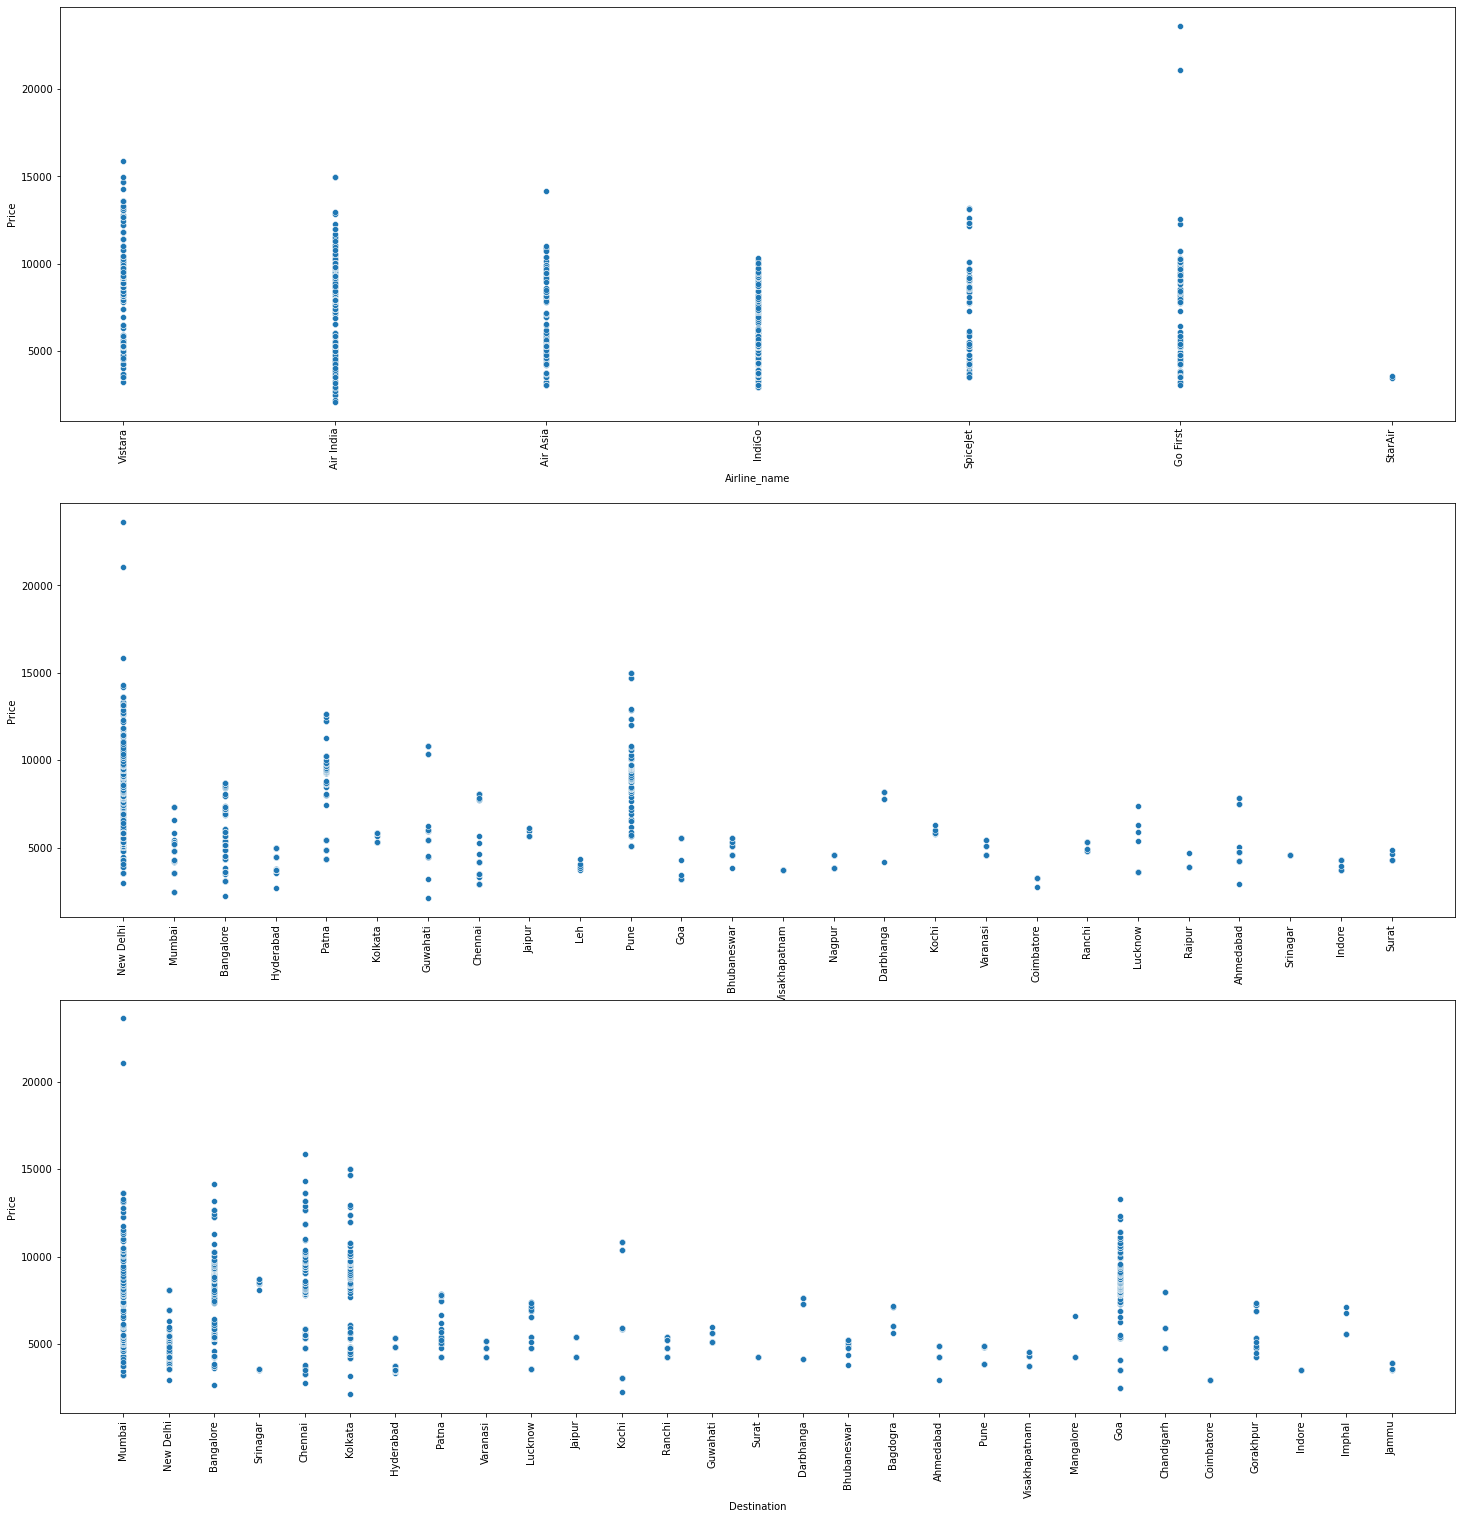

In [31]:
a=1
plt.figure(figsize=(25,35))
for i in cat:
    plt.subplot(4,1,a)
    sns.scatterplot(x=data[i],y=data.Price)
    plt.xticks(rotation=90)
    a=a+1
plt.show()

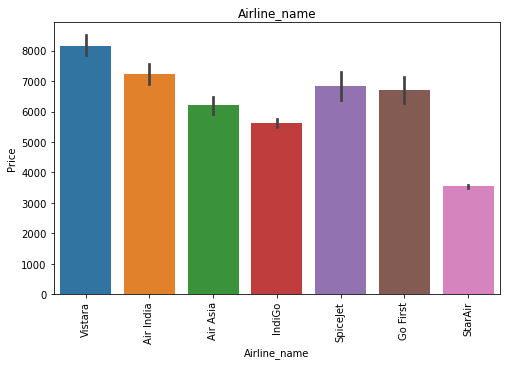

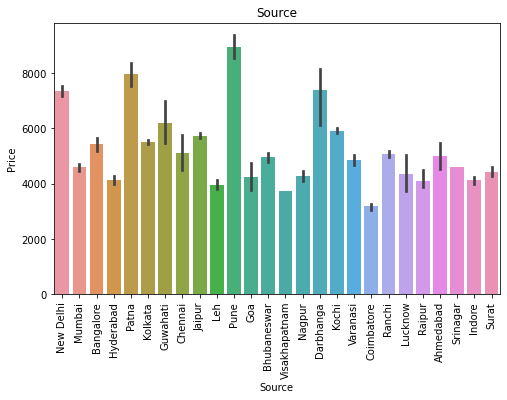

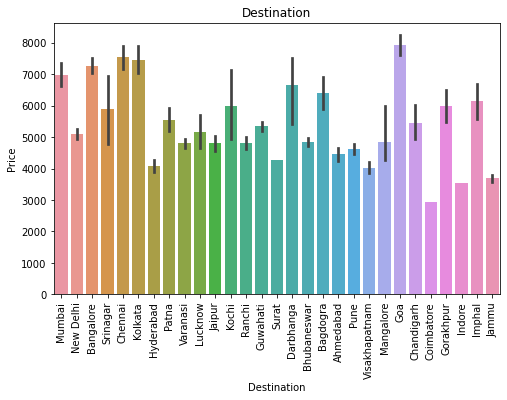

In [32]:
for i in cat:
    plt.figure(figsize=(8,5))
    sns.barplot(x=data[i],y='Price',data=data)
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.title(i)
    plt.show()

Observation in terms of Price:
1. Vistara flight having highest price as compared to others followed by AirIndia.
2. Flights originating from  Pune followed by Patna and New Delhi.
3. Flights reaching Goa is having highest price followed by Chennai,Kolkata,Banglore and Mumbai.

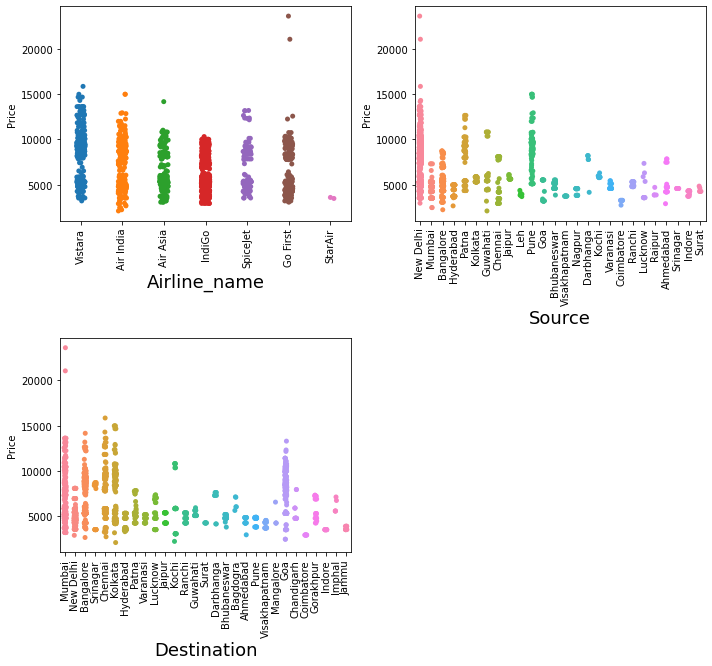

In [33]:
plt.figure(figsize=(10,100))
n=1
for i in data.columns:
    if data[i].dtype=='O' and n<=44:
        ax=plt.subplot(22,2,n)
        sns.stripplot(x=data [i], y=data.Price, data=data)
        plt.xlabel(i, fontsize=18)
        plt.xticks(rotation=90)
        n+=1
    plt.tight_layout()

# Bivariant Plot for Numerical Data

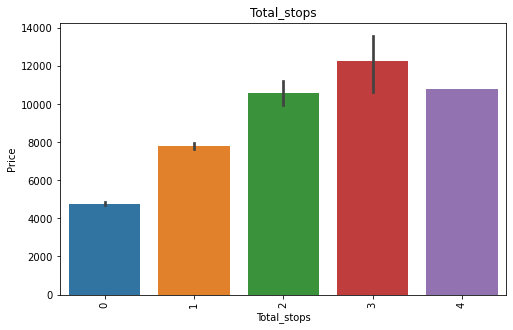

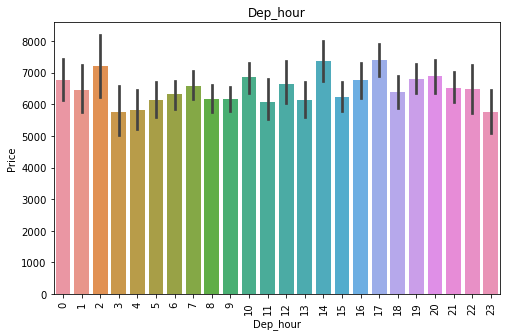

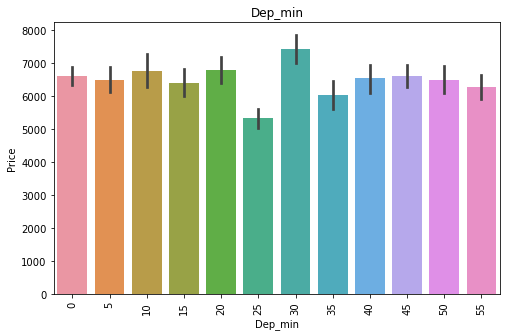

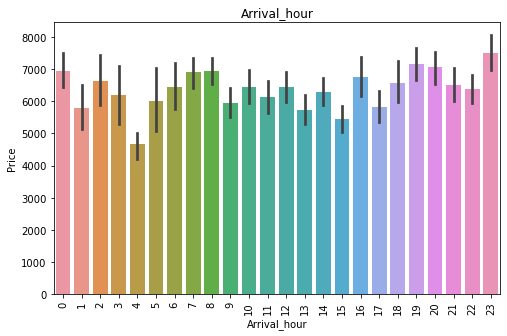

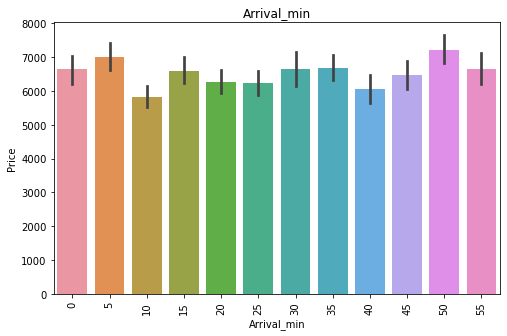

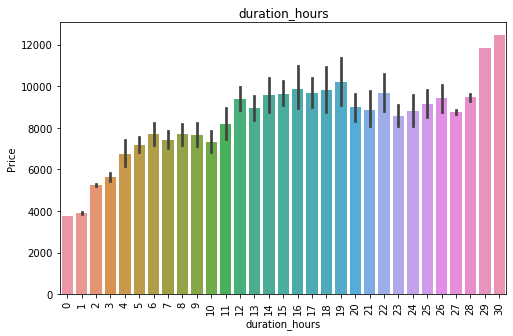

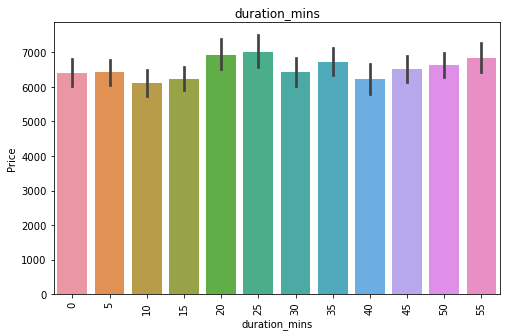

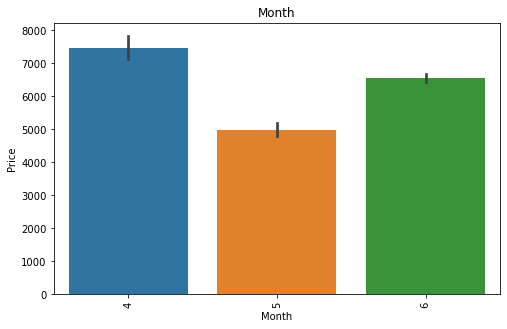

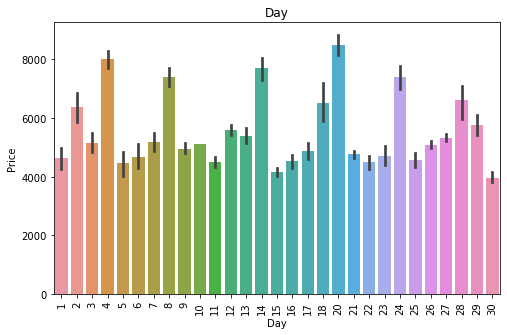

In [34]:
for i in num:
    plt.figure(figsize=(8,5))
    sns.barplot(x=data[i],y='Price',data=data)
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.title(i)
    plt.show()

Observation in terms of Price:
1. Flights having 3 stops are hioghest in price followed by 4 stoppage and 2 stoppage flights.
2. Early morning 1 am , 2pm ands 4 pm  departure hour flight are more in price.
3. At 30 mintues departure the flight price is higher.
4. Night arriving flights are higher is price.
5. Duration is directly proportional to the price, as duration increases flight price also increases.
6. Flight prices are likely higer in the month of April and June compared to May.
7. Flight prices are higher on some specific date it seems like 4th,8th,14th,20th and 24th.

In [35]:
# Outlier Detection

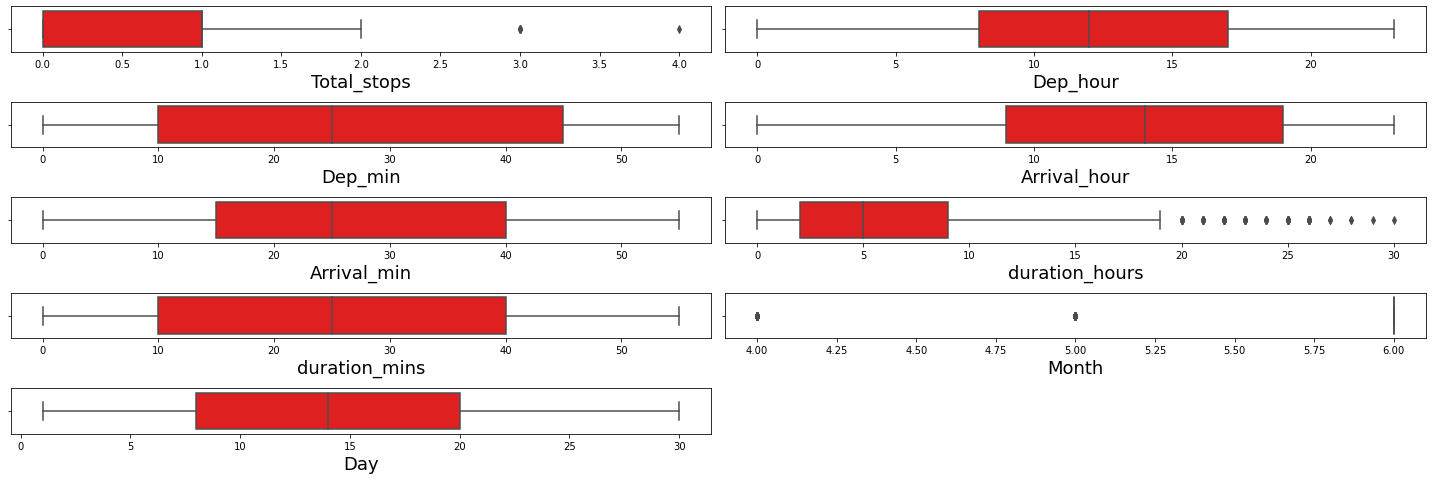

In [36]:
plt.figure(figsize=(20,50))
n=1
for i in num:
    ax=plt.subplot(38,2,n)
    sns.boxplot(data[i],color='red')
    plt.xlabel(i, fontsize=18)
    n+=1
plt.tight_layout()

Observation::
    Not much of outliers are present in the dataset.

# Feature Engineering

In [37]:
data.columns

Index(['Airline_name', 'Source', 'Destination', 'Total_stops', 'Price',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hours',
       'duration_mins', 'Month', 'Day'],
      dtype='object')

In [38]:
# Change the categorical variables using encoding

encoder=LabelEncoder()
data['Airline_name']=encoder.fit_transform(data['Airline_name'])
data['Source']=encoder.fit_transform(data['Source'])
data['Destination']=encoder.fit_transform(data['Destination'])

In [39]:
data.head()

,Airline_name,Source,Destination,Total_stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Month,Day
0,6,17,20,0,4800,6,0,8,0,2,0,4,29
1,1,17,20,0,4800,7,0,9,5,2,5,4,29
2,0,17,20,0,4800,4,25,6,35,2,10,4,29
3,1,17,20,0,4800,8,0,10,10,2,10,4,29
4,6,17,20,0,4800,20,40,22,50,2,10,4,29


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Airline_name    1727 non-null   int32
 1   Source          1727 non-null   int32
 2   Destination     1727 non-null   int32
 3   Total_stops     1727 non-null   int64
 4   Price           1727 non-null   int64
 5   Dep_hour        1727 non-null   int64
 6   Dep_min         1727 non-null   int64
 7   Arrival_hour    1727 non-null   int64
 8   Arrival_min     1727 non-null   int64
 9   duration_hours  1727 non-null   int64
 10  duration_mins   1727 non-null   int64
 11  Month           1727 non-null   int64
 12  Day             1727 non-null   int64
dtypes: int32(3), int64(10)
memory usage: 155.3 KB


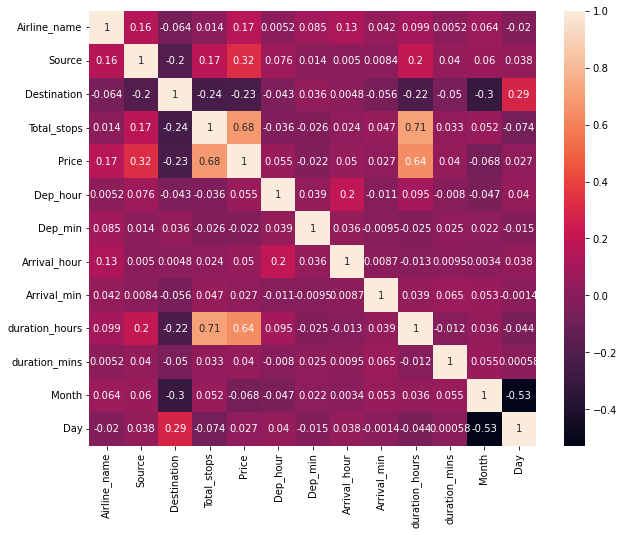

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

Observation:
Total no of stops and duration taken is highly correlated with price.

# Model Building

In [42]:
Y=data['Price']    # Dependent variable
X=data.drop('Price',axis=1)# Independent variable

In [43]:
#Scaling the features Using standaard Scalar

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X)
x_scaled=pd.DataFrame(X,columns=X.columns)

In [44]:
# Split the train dataset:

X_train,X_test,Y_train,Y_test=train_test_split(x_scaled,Y,test_size=0.2,random_state=42)

In [45]:
# Creating objects for the Regressor Models
Linear=LinearRegression()
DecisionTree=DecisionTreeRegressor()
knn=KNeighborsRegressor()
Random=RandomForestRegressor()


In [46]:
# For fitting the model

alg=[Linear,DecisionTree,knn,Random]
acc_models={}
for model in alg:
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    acc_models[model]=round(r2_score(Y_test,Y_pred)*100,1)
    print("Model Name:",model) 
    print('Accuracy ::',{round(r2_score(Y_test,Y_pred)*100,1)})
    print('Mean Absolute Error(MAE) is::',{mean_absolute_error(Y_test,Y_pred)})
    print('Mean Squared Error(MSE) ::',{mean_squared_error(Y_test,Y_pred)})
    print('Root Mean Squared Error is ::',{np.sqrt(mean_squared_error(Y_test,Y_pred))})
    print("--------------------------------------------------------")


Model Name: LinearRegression()
Accuracy :: {58.8}
Mean Absolute Error(MAE) is:: {1215.2279525553568}
Mean Squared Error(MSE) :: {2379830.556335377}
Root Mean Squared Error is :: {1542.6699440694945}
--------------------------------------------------------
Model Name: DecisionTreeRegressor()
Accuracy :: {84.0}
Mean Absolute Error(MAE) is:: {462.7543352601156}
Mean Squared Error(MSE) :: {927496.725433526}
Root Mean Squared Error is :: {963.0663141412049}
--------------------------------------------------------
Model Name: KNeighborsRegressor()
Accuracy :: {46.0}
Mean Absolute Error(MAE) is:: {1371.9630057803467}
Mean Squared Error(MSE) :: {3121662.068208093}
Root Mean Squared Error is :: {1766.8225910396586}
--------------------------------------------------------
Model Name: RandomForestRegressor()
Accuracy :: {89.6}
Mean Absolute Error(MAE) is:: {460.5843713872832}
Mean Squared Error(MSE) :: {598414.387906232}
Root Mean Squared Error is :: {773.5724839381453}
--------------------------

In [47]:
acc_models

{LinearRegression(): 58.8,
 DecisionTreeRegressor(): 84.0,
 KNeighborsRegressor(): 46.0,
 RandomForestRegressor(): 89.6}

Observation:
    Random Forest Regressor is showing highest accuracy.

<AxesSubplot:xlabel='Price', ylabel='Density'>

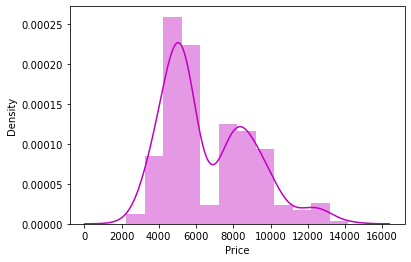

In [54]:
sns.distplot((Y_test),color='m')

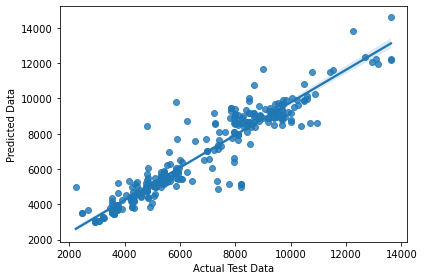

In [49]:
RandomForest=RandomForestRegressor()
RandomForest.fit(X_train,Y_train)
Y_pred=RandomForest.predict(X_test)
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

In [50]:
df=pd.DataFrame({'Y Test':Y_test,'Pred':Y_pred},columns=['Y Test','Pred'])
df.head()

,Y Test,Pred
599,4794,4832.83
932,4801,8436.40
628,5537,6246.26
1497,8579,8567.93
1262,5325,5419.50


# Hyper Tuning the Random Forest Model:

In [51]:
X_train,Y_train,X_test,Y_test=train_test_split(x_scaled,Y,test_size=0.2,random_state=80)
estimator=RandomForestRegressor()

param_grid={
    "n_estimators":[10,20,30],
    "max_features":["auto", "sqrt", "log2"],
    "min_samples_split":[2,4,8],
    "bootstrap":[True,False]    
}
gridsearch=GridSearchCV(estimator,param_grid,n_jobs=-1,cv=5)

gridsearch.fit(x_scaled,Y)
print(gridsearch.best_params_ , gridsearch.best_score_)

{'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 20} -0.1488012991705781


In [53]:
RandomForest=RandomForestRegressor(n_estimators=20,max_features='log2',min_samples_split=2,bootstrap=True)
RandomForest.fit(x_scaled,Y)
Y_pred=RandomForest.predict(x_scaled)
r2_sc=r2_score(Y,Y_pred)
print("r2_score:",r2_sc*100)


r2_score: 97.91855960350247


The model is showing an increase of 89.6 to 97.9%

In [55]:
import joblib
joblib.dump(RandomForest,"Flight Price Prediction.pkl")

['Flight Price Prediction.pkl']